In [1]:
import pandas as pd
import numpy as np
from numpy import where
#from matplotlip import pyplot
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

from scipy.stats import chi2_contingency

from sklearn.neighbors import KNeighborsClassifier 
import sklearn.model_selection as model_selection
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from decimal import *

import import_ipynb
from p1_utils import *


importing Jupyter notebook from p1_utils.ipynb


In [2]:
medical_data= pd.read_csv("/Users/mikhail/Downloads/mamografias.csv")

In [3]:
medical_data.head()

BI-RADS Age Shape Margin Density Severity
0       5  67     L      5       3  maligno
1       4  43     R      1       ?  maligno
2       5  58     I      5       3  maligno
3       4  28     R      1       3  benigno
4       5  74     R      5       ?  maligno

In [4]:
medical_data.describe()

BI-RADS  Age Shape Margin Density Severity
count      961  961   961    961     961      961
unique       7   74     5      6       5        2
top          4   59     I      1       3  benigno
freq       547   36   400    357     798      516

In [5]:
medical_data

BI-RADS Age Shape Margin Density Severity
0         5  67     L      5       3  maligno
1         4  43     R      1       ?  maligno
2         5  58     I      5       3  maligno
3         4  28     R      1       3  benigno
4         5  74     R      5       ?  maligno
..      ...  ..   ...    ...     ...      ...
956       4  47     O      1       3  benigno
957       4  56     I      5       3  maligno
958       4  64     I      5       3  benigno
959       5  66     I      5       3  maligno
960       4  62     L      3       3  benigno

[961 rows x 6 columns]

## Data Preprocessing: Feauture Importance and Interpretation 

In [6]:
csq=chi2_contingency(pd.crosstab(medical_data['Severity'], medical_data['BI-RADS']))
print("P-value: ",csq[1])

P-value:  8.074648239760705e-84


In [7]:
csq2=chi2_contingency(pd.crosstab(medical_data['Severity'], medical_data['Shape']))
print("P-value: ",csq2[1])

P-value:  1.4282437221731736e-68


In [8]:
csq3=chi2_contingency(pd.crosstab(medical_data['Severity'], medical_data['Density']))
print("P-value: ",csq3[1])

P-value:  0.001203082705703406


In [9]:
csq4=chi2_contingency(pd.crosstab(medical_data['Severity'], medical_data['Margin']))
print("P-value: ",csq4[1])

P-value:  2.0163301240637636e-69


In [10]:
medical_data.isnull().sum()

BI-RADS     0
Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64

In [11]:
# drop all rows with missing values
indexNames = medical_data[ (medical_data['BI-RADS'] == '?') | (medical_data['Age'] == '?') 
                           | (medical_data['Shape'] == '?') | (medical_data['Margin'] == '?') |
                         (medical_data['Density'] == '?') | (medical_data['Severity'] == '?')].index

In [12]:
medical_data.drop(indexNames , inplace=True)
print("Modified  Dataframe" , medical_data, sep='\n')

Modified  Dataframe
    BI-RADS Age Shape Margin Density Severity
0         5  67     L      5       3  maligno
2         5  58     I      5       3  maligno
3         4  28     R      1       3  benigno
8         5  57     R      5       3  maligno
9         5  60     N      5       1  maligno
..      ...  ..   ...    ...     ...      ...
956       4  47     O      1       3  benigno
957       4  56     I      5       3  maligno
958       4  64     I      5       3  benigno
959       5  66     I      5       3  maligno
960       4  62     L      3       3  benigno

[847 rows x 6 columns]


In [13]:
num=['BI-RADS', 'Age', 'Margin', 'Density']
corr_df=medical_data[num]  #New dataframe to calculate correlation between numeric features
cor= corr_df.astype('float64').corr(method='pearson')
print(cor)


          BI-RADS       Age    Margin   Density
BI-RADS  1.000000  0.300853  0.405330  0.080821
Age      0.300853  1.000000  0.418965  0.035828
Margin   0.405330  0.418965  1.000000  0.108542
Density  0.080821  0.035828  0.108542  1.000000


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


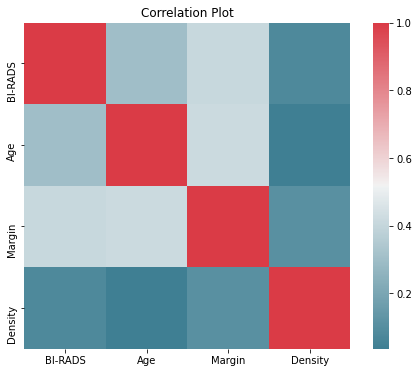

In [14]:
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

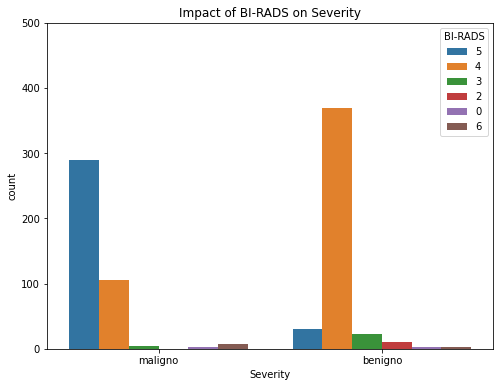

In [15]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Severity', data=medical_data, hue='BI-RADS')
ax.set_ylim(0,500)
plt.title("Impact of BI-RADS on Severity")
plt.savefig('Impact of BI-RADS on Severity.png',bbox_inches='tight', dpi=300)
plt.show()

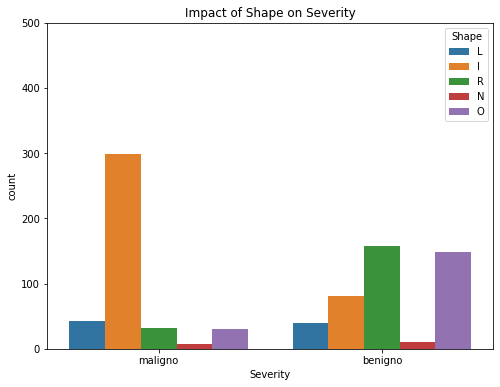

In [16]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Severity', data=medical_data, hue='Shape')
ax.set_ylim(0,500)
plt.title("Impact of Shape on Severity")
plt.savefig('Impact of Shape on Severity.png',bbox_inches='tight', dpi=300)
plt.show()

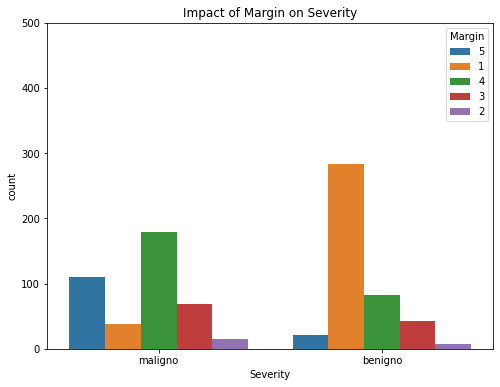

In [17]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Severity', data=medical_data, hue='Margin')
ax.set_ylim(0,500)
plt.title("Impact of Margin on Severity")
plt.savefig('Impact of Margin on Severity.png',bbox_inches='tight', dpi=300)
plt.show()

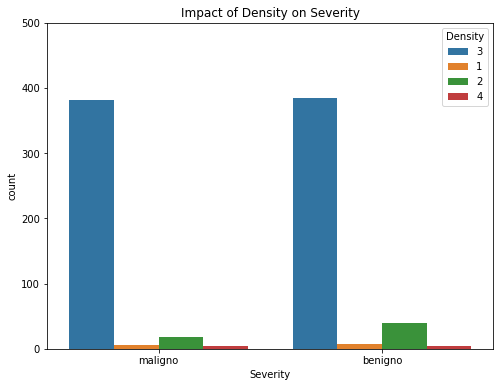

In [18]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Severity', data=medical_data, hue='Density')
ax.set_ylim(0,500)
plt.title("Impact of Density on Severity")
plt.savefig('Impact of Density on Severity.png',bbox_inches='tight', dpi=300)
plt.show()

In [19]:

# create the Labelencoder object
le = preprocessing.LabelEncoder()
#create LabelEncoder
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric

medical_data['BI-RADS'] = le.fit_transform(medical_data['BI-RADS'])
medical_data['Age'] = le.fit_transform(medical_data['Age'])
medical_data['Shape'] = le.fit_transform(medical_data['Shape'])
medical_data['Margin'] = le.fit_transform(medical_data['Margin'])
medical_data['Density'] = le.fit_transform(medical_data['Density'])
medical_data['Severity'] = le.fit_transform(medical_data['Severity'])
#display the initial records
medical_data.head()

BI-RADS  Age  Shape  Margin  Density  Severity
0        4   49      1       4        2         1
2        4   40      0       4        2         1
3        3   10      4       0        2         0
8        4   39      4       4        2         1
9        4   42      2       4        0         1

In [20]:
# create input dataframe w/ all data except the target, which will be predicted
X = medical_data.drop(columns=["Severity"]) 
X.head() #test if successfull

BI-RADS  Age  Shape  Margin  Density
0        4   49      1       4        2
2        4   40      0       4        2
3        3   10      4       0        2
8        4   39      4       4        2
9        4   42      2       4        0

In [21]:
#create target dataframe with the column we want to predict
Y = medical_data["Severity"].values
Y

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,

In [22]:
X_no_age = medical_data.drop(columns=["Severity", "Age"]) 
X_no_age.head() #test if successfull

BI-RADS  Shape  Margin  Density
0        4      1       4        2
2        4      0       4        2
3        3      4       0        2
8        4      4       4        2
9        4      2       4        0

In [23]:
X_no_BR = medical_data.drop(columns=["Severity", "BI-RADS"]) 
X_no_BR.head() #test if successfull

Age  Shape  Margin  Density
0   49      1       4        2
2   40      0       4        2
3   10      4       0        2
8   39      4       4        2
9   42      2       4        0

In [24]:
X_no_BR_Age = medical_data.drop(columns=["Severity", "BI-RADS", "Age"]) 
X_no_BR_Age.head() #test if successfull

Shape  Margin  Density
0      1       4        2
2      0       4        2
3      4       0        2
8      4       4        2
9      2       4        0

In [25]:
X_no_D = medical_data.drop(columns=["Severity", "Density"]) 
X_no_D.head() #test if successfull

BI-RADS  Age  Shape  Margin
0        4   49      1       4
2        4   40      0       4
3        3   10      4       0
8        4   39      4       4
9        4   42      2       4

In [26]:
X_no_D_BR = medical_data.drop(columns=["Severity", "Density", "BI-RADS"]) 
X_no_D_BR.head() #test if successfull

Age  Shape  Margin
0   49      1       4
2   40      0       4
3   10      4       0
8   39      4       4
9   42      2       4

In [27]:
X_no_D_Age = medical_data.drop(columns=["Severity", "Density", "Age"]) 
X_no_D_Age.head() #test if successfull

BI-RADS  Shape  Margin
0        4      1       4
2        4      0       4
3        3      4       0
8        4      4       4
9        4      2       4

In [28]:

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, train_size=0.8,test_size=0.2, random_state=42)

In [29]:
X_train

BI-RADS  Age  Shape  Margin  Density
423        3   13      4       0        2
942        4   40      1       3        2
3          3   10      4       0        2
378        4   37      0       4        2
771        1   17      3       0        1
..       ...  ...    ...     ...      ...
119        4   66      0       4        2
166        3   50      4       0        2
347        4   60      0       3        2
533        0   40      0       3        2
162        3    5      1       0        2

[677 rows x 5 columns]

In [30]:
X_test

BI-RADS  Age  Shape  Margin  Density
556        3   43      3       2        2
427        3   38      0       3        2
358        4   37      0       3        2
353        3   25      4       0        2
957        3   38      0       4        2
..       ...  ...    ...     ...      ...
223        4   61      0       3        2
395        4   42      0       2        2
161        3   23      3       0        2
445        4   48      4       3        2
544        4   49      0       4        2

[170 rows x 5 columns]

In [31]:
# summarize observations by class label
counter = Counter(Y)
print(counter)

Counter({0: 437, 1: 410})


In [32]:
y_test

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1])

In [33]:
#calculate null accuracy
max(y_test.mean(),1-y_test.mean())

0.5294117647058824

In [34]:
models=[] #save models to evaluate later

In [35]:
best_models=[] #save best models to evalute in a loop later

In [36]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)

#train model with cv of 5 
cv_scores = cross_val_score(knn, X, Y, cv=5, scoring="accuracy") 

#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.77058824 0.82352941 0.81065089 0.81065089 0.79289941]
cv_scores mean:0.8016637660981552


In [37]:
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 31)}
#use gridsearch to test all values for n_neighbors 
knn_gscv = GridSearchCV(knn2, param_grid, cv=5, n_jobs=-1, scoring= "recall")
#fit model to data
knn_gscv.fit(X, Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='recall')

In [38]:
#check top performing n_neighbors value
knn_gscv.best_params_


{'n_neighbors': 27}

In [39]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.8585365853658538

best parameters: {'n_neighbors': 27}
best score:      0.85854 (+/-0.01825)
{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 27,
 'p': 2,
 'weights': 'uniform'}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
26       0.005884      0.000695         0.022039        0.003788   
28       0.008863      0.003440         0.024108        0.009160   
27       0.005525      0.000584         0.017680        0.002563   
29       0.005322      0.000762         0.019838        0.004229   
24       0.005516      0.000147         0.022997        0.005101   
22       0.006734      0.002579         0.018755        0.000845   
14       0.007433      0.001130         0.030734        0.003796   
18       0.005579      0.000322         0.023618        0.004894   
20       0.007992      0.001938         0.023056        0.005416   
21       0.007183      0.001472         0.022585        0.004106   
10       0.005572      0.000114         0.020236        0.001938   
16       0.008580      0.002132         0.021864        0.004674   
19       0.006544      0.001593         0.022992        0.003967   
25       0.006502      0.001972         0.023477        0.004946   
23       0.008049      0.004499         0.020313        0.001689   

   param_n_neighbors               params  split0_test_score  \
26                27  {'n_neighbors': 27}           0.865854   
28                29  {'n_neighbors': 29}           0.853659   
27                28  {'n_neighbors': 28}           0.865854   
29                30  {'n_neighbors': 30}           0.865854   
24                25  {'n_neighbors': 25}           0.841463   
22                23  {'n_neighbors': 23}           0.829268   
14                15  {'n_neighbors': 15}           0.829268   
18                19  {'n_neighbors': 19}           0.829268   
20                21  {'n_neighbors': 21}           0.829268   
21                22  {'n_neighbors': 22}           0.829268   
10                11  {'n_neighbors': 11}           0.853659   
16                17  {'n_neighbors': 17}           0.817073   
19                20  {'n_neighbors': 20}           0.817073   
25                26  {'n_neighbors': 26}           0.841463   
23                24  {'n_neighbors': 24}           0.817073   

    split1_test_score  split2_test_score  split3_test_score  \
26           0.890244           0.841463           0.853659   
28           0.914634           0.829268           0.829268   
27           0.890244           0.829268           0.829268   
29           0.902439           0.829268           0.817073   
24           0.890244           0.841463           0.841463   
22           0.902439           0.841463           0.817073   
14           0.902439           0.829268           0.817073   
18           0.853659           0.841463           0.841463   
20           0.890244           0.829268           0.817073   
21           0.890244           0.829268           0.817073   
10           0.890244           0.829268           0.817073   
16           0.878049           0.841463           0.804878   
19           0.853659           0.841463           0.804878   
25           0.890244           0.829268           0.817073   
23           0.890244           0.829268           0.817073   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
26           0.841463         0.858537        0.018252                1  
28           0.841463         0.853659        0.031801                2  
27           0.841463         0.851220        0.023647                3  
29           0.829268         0.848780        0.031425                4  
24           0.829268         0.848780        0.021263                4  
22           0.841463         0.846341        0.029471                6  
14           0.853659         0.846341        0.030463                6  
18           0.853659         0.843902        0.009126                8  
20           0.841463         0.841463        0.025581                9  
21           0.829268         0.839024        0.026042               10  
10           0.804878         0.839024        0.030267             

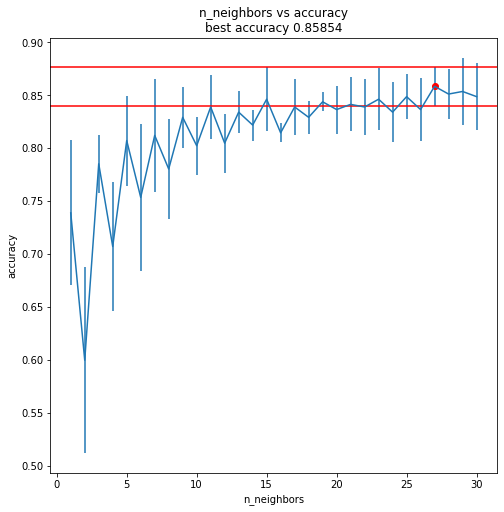

In [40]:
GridSearch_table_plot(knn_gscv, "n_neighbors", negative=False, graph=True)

In [41]:
#models.append(knn_gscv.best_estimator_)
best_models.append(knn_gscv.best_estimator_)
knn_gscv.best_estimator_

KNeighborsClassifier(n_neighbors=27)

KNeighborsClassifier(n_neighbors=27)


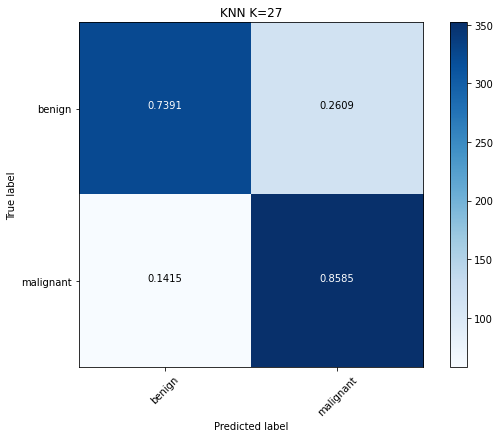

Confusion Matrix
[[323 114]
 [ 58 352]]
Accuracy: 0.7969303423848878
Sensitivity: 0.8585365853658536
Specificity: 0.7391304347826086
False Positive Rate: 0.2608695652173913
Preciscion: 0.7553648068669528
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       437
           1       0.76      0.86      0.80       410

    accuracy                           0.80       847
   macro avg       0.80      0.80      0.80       847
weighted avg       0.80      0.80      0.80       847

AUC: 0.8649104202712509


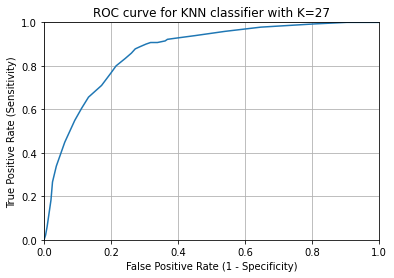

In [42]:
model = knn_gscv.best_estimator_

evaluate_model(model,X,Y, "KNN K=27", "knn_cm")
# store the predicted probabilities for class 1
y_pred_prob = cross_val_predict(model, X, Y, cv=5,method='predict_proba')[:, 1]
roc_curve(Y, y_pred_prob, 'ROC curve for KNN classifier with K=27', 'knn_ROC.png')

In [43]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

dtree =  DecisionTreeClassifier()

cv_scores = cross_val_score(dtree, X, Y, cv=5, scoring="recall") 

#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.79268293 0.84146341 0.68292683 0.64634146 0.62195122]
cv_scores mean:0.7170731707317074


In [44]:
parameters = {'criterion':['gini','entropy'], 'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, cv=5)
clf.fit(X=X, y=Y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.8405917159763314 {'criterion': 'entropy', 'max_depth': 3}


best parameters: {'criterion': 'entropy', 'max_depth': 3}
best score:      0.84059 (+/-0.02099)
{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
17       0.004749      0.001007         0.003250        0.000781   
0        0.006282      0.003268         0.003287        0.000964   
1        0.005325      0.001598         0.003194        0.000947   
19       0.003470      0.000267         0.002410        0.000247   
18       0.004183      0.000420         0.002585        0.000343   
21       0.008460      0.004907         0.005919        0.002775   
3        0.005279      0.001693         0.003586        0.000798   
20       0.003993      0.001256         0.003184        0.001340   
2        0.005366      0.000927         0.003863        0.000250   
22       0.012447      0.011676         0.004855        0.001553   
4        0.005569      0.001477         0.003940        0.002330   
24       0.004871      0.001169         0.002521        0.000383   
23       0.006504      0.001838         0.003691        0.001080   
26       0.003908      0.000319         0.002639        0.000460   
25       0.003715      0.000335         0.002172        0.000257   

   param_criterion param_max_depth                                     params  \
17         entropy               3   {'criterion': 'entropy', 'max_depth': 3}   
0             gini               3      {'criterion': 'gini', 'max_depth': 3}   
1             gini               4      {'criterion': 'gini', 'max_depth': 4}   
19         entropy               5   {'criterion': 'entropy', 'max_depth': 5}   
18         entropy               4   {'criterion': 'entropy', 'max_depth': 4}   
21         entropy               7   {'criterion': 'entropy', 'max_depth': 7}   
3             gini               6      {'criterion': 'gini', 'max_depth': 6}   
20         entropy               6   {'criterion': 'entropy', 'max_depth': 6}   
2             gini               5      {'criterion': 'gini', 'max_depth': 5}   
22         entropy               8   {'criterion': 'entropy', 'max_depth': 8}   
4             gini               7      {'criterion': 'gini', 'max_depth': 7}   
24         entropy              10  {'criterion': 'entropy', 'max_depth': 10}   
23         entropy               9   {'criterion': 'entropy', 'max_depth': 9}   
26         entropy              12  {'criterion': 'entropy', 'max_depth': 12}   
25         entropy              11  {'criterion': 'entropy', 'max_depth': 11}   

    split0_test_score  split1_test_score  split2_test_score  \
17           0.847059           0.852941           0.852071   
0            0.829412           0.870588           0.852071   
1            0.788235           0.864706           0.852071   
19           0.776471           0.847059           0.846154   
18           0.770588           0.852941           0.852071   
21           0.758824           0.829412           0.857988   
3            0.764706           0.852941           0.857988   
20           0.758824           0.847059           0.852071   
2            0.758824           0.864706           0.822485   
22           0.747059           0.829412           0.852071   
4            0.758824           0.835294           0.828402   
24           0.770588           0.829412           0.822485   
23           0.764706           0.811765           0.822485   
26           0.776471           0.811765           0.798817   
25           0.776471           0.817647           0.822485   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
17           0.852071           0.798817         0.840592        0.020991   
0            0.846154           0.798817         0.839408        0.024189   
1            0.810651           0.792899         0.821712        0.031123   
19           0.816568           0.798817         0.817014        0.027302   
18           0.804734           0.798817         0.815830        0.032094   
21           0.810651           0.786982         0.808771        0.034122   
3            0.798817           0.769231         0.808737        0.039

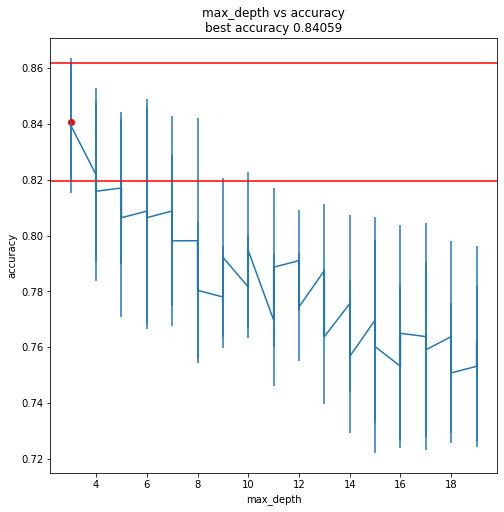

In [45]:
GridSearch_table_plot(clf, "max_depth", negative=False, graph=True)

[Text(167.4, 190.26, 'X[0] <= 3.5\nentropy = 0.999\nsamples = 847\nvalue = [437, 410]'),
 Text(83.7, 135.9, 'X[2] <= 0.5\nentropy = 0.758\nsamples = 517\nvalue = [404, 113]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 51.5\nentropy = 0.998\nsamples = 122\nvalue = [58, 64]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.993\nsamples = 100\nvalue = [55, 45]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.575\nsamples = 22\nvalue = [3, 19]'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 34.5\nentropy = 0.541\nsamples = 395\nvalue = [346, 49]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.286\nsamples = 220\nvalue = [209, 11]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.755\nsamples = 175\nvalue = [137, 38]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 39.5\nentropy = 0.469\nsamples = 330\nvalue = [33, 297]'),
 Text(209.25, 81.53999999999999, 'X[4] <= 1.5\nentropy = 0.635\nsamples = 106\nvalue = [17, 89]'),
 Text(188.32500000000002, 27.180000000000007, 'ent

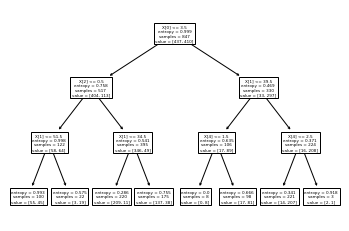

In [46]:
tree.plot_tree(tree_model)

In [47]:
#best_models.append(tree_model)
#tree_model

In [48]:
#best_models

In [49]:
classes = le.inverse_transform(tree_model.classes_)
classes

array(['benigno', 'maligno'], dtype=object)

In [50]:
classes = le.inverse_transform(tree_model.classes_)

features = X.columns

import graphviz
import pylab
# DOT data
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                                feature_names=features,  
                                class_names=classes,
                                filled=True, rounded=True,
                               special_characters=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

filename = graph.render(filename='tree_model.png')

pylab.savefig('tree_model.png')


<Figure size 432x288 with 0 Axes>

In [51]:
tree_no_BR = DecisionTreeClassifier(criterion='entropy', 
                                     max_depth=3)

In [52]:
tree_no_BR = DecisionTreeClassifier(criterion='entropy', 
                                     max_depth=3)
X3_train, X3_test, y3_train, y3_test = model_selection.train_test_split(X_no_BR, Y, 
                                                                    train_size=0.8,
                                                                    test_size=0.2, 
                                                                    random_state=42)
tree_no_BR.fit(X3_train,y3_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [53]:
tree_no_BR_Age = DecisionTreeClassifier(criterion='entropy', 
                                     max_depth=3)
X3_train, X3_test, y3_train, y3_test = model_selection.train_test_split(X_no_BR_Age, Y, 
                                                                    train_size=0.8,
                                                                    test_size=0.2, 
                                                                    random_state=42)
tree_no_BR_Age.fit(X3_train,y3_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

DecisionTreeClassifier(criterion='entropy', max_depth=3)


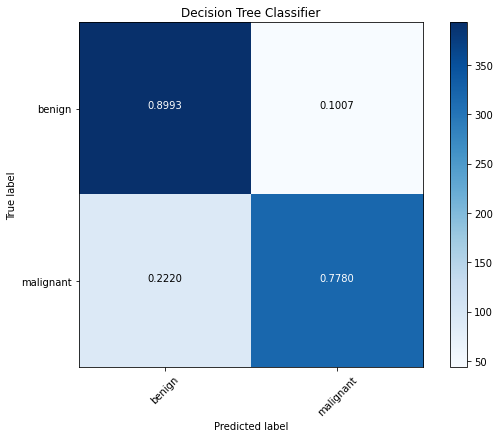

Confusion Matrix
[[393  44]
 [ 91 319]]
Accuracy: 0.8406139315230224
Sensitivity: 0.7780487804878049
Specificity: 0.8993135011441648
False Positive Rate: 0.10068649885583524
Preciscion: 0.8787878787878788
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       437
           1       0.88      0.78      0.83       410

    accuracy                           0.84       847
   macro avg       0.85      0.84      0.84       847
weighted avg       0.84      0.84      0.84       847

AUC: 0.8778701791594575


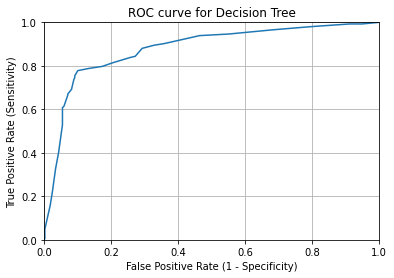

In [54]:
#change this var to get predictions of different modified datasets (without certain features)
model = tree_no_BR_Age

evaluate_model(model,X,Y, "Decision Tree Classifier", "DT_cm")
# store the predicted probabilities for class 1
y_pred_prob = cross_val_predict(model, X, Y, cv=5,method='predict_proba')[:, 1]
roc_curve(Y, y_pred_prob, 'ROC curve for Decision Tree', 'DT_ROC.png')

In [55]:
best_models.append(model)

## SVM


In [56]:
from sklearn import svm

# create SVM classifier
svm_clf = svm.SVC(kernel='linear', probability=True)

cv_scores = cross_val_score(svm_clf, X, Y, cv=5, scoring="accuracy") 

#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.81176471 0.84705882 0.84023669 0.81065089 0.76923077]
cv_scores mean:0.8157883745214061


In [57]:
#tuning linear SVM
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear']}
clf_acc = GridSearchCV(svm.SVC(probability=True), param_grid, cv=5, n_jobs=-1)
clf_acc.fit(X=X, y=Y)
svm_model_acc = clf_acc.best_estimator_
print (clf_acc.best_score_, clf_acc.best_params_)



0.8157883745214061 {'C': 1, 'gamma': 1, 'kernel': 'linear'}


best parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
best score:      0.81579 (+/-0.02752)
{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 1,
 'kernel': 'linear',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
4        0.515581      0.175724         0.010277        0.001892       1   
5        0.509160      0.168227         0.008614        0.002386       1   
6        0.536341      0.175668         0.011430        0.004786       1   
7        0.536657      0.216352         0.009640        0.005489       1   
8        1.982636      0.951126         0.006340        0.000494      10   
9        1.754890      0.952615         0.006415        0.001282      10   
10       1.706604      0.820219         0.006287        0.002180      10   
11       1.761423      1.060517         0.005656        0.000714      10   
12      16.696261      8.205810         0.007847        0.002629     100   
13      17.075763     10.456007         0.005146        0.000669     100   
14      16.170405     11.077505         0.009635        0.007448     100   
15      17.170494      8.616554         0.006528        0.003034     100   
0        0.168481      0.021531         0.007147        0.001825     0.1   
1        0.235827      0.064116         0.009281        0.001799     0.1   
2        0.243467      0.047005         0.008756        0.002509     0.1   

   param_gamma param_kernel                                          params  \
4            1       linear        {'C': 1, 'gamma': 1, 'kernel': 'linear'}   
5          0.1       linear      {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}   
6         0.01       linear     {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}   
7        0.001       linear    {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}   
8            1       linear       {'C': 10, 'gamma': 1, 'kernel': 'linear'}   
9          0.1       linear     {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}   
10        0.01       linear    {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}   
11       0.001       linear   {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}   
12           1       linear      {'C': 100, 'gamma': 1, 'kernel': 'linear'}   
13         0.1       linear    {'C': 100, 'gamma': 0.1, 'kernel': 'linear'}   
14        0.01       linear   {'C': 100, 'gamma': 0.01, 'kernel': 'linear'}   
15       0.001       linear  {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}   
0            1       linear      {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}   
1          0.1       linear    {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}   
2         0.01       linear   {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}   

    split0_test_score  split1_test_score  split2_test_score  \
4            0.811765           0.847059           0.840237   
5            0.811765           0.847059           0.840237   
6            0.811765           0.847059           0.840237   
7            0.811765           0.847059           0.840237   
8            0.811765           0.847059           0.840237   
9            0.811765           0.847059           0.840237   
10           0.811765           0.847059           0.840237   
11           0.811765           0.847059           0.840237   
12           0.811765           0.847059           0.840237   
13           0.811765           0.847059           0.840237   
14           0.811765           0.847059           0.840237   
15           0.811765           0.847059           0.840237   
0            0.805882           0.852941           0.834320   
1            0.805882           0.852941           0.834320   
2            0.805882           0.852941           0.834320   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
4            0.810651           0.769231         0.815788        0.027516   
5            0.810651           0.769231         0.815788        0.027516   
6            0.810651           0.769231         0.815788        0.027516   
7            0.810651           0.769231         0.815788        0.027516   
8            0.810651           0.769231         0.815788        0.027516   
9            0.810651           0.769231         0.

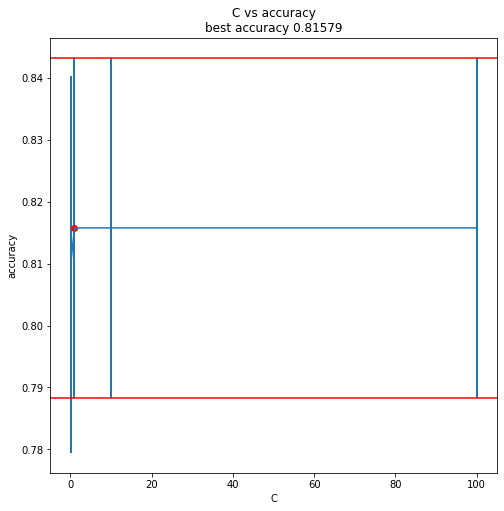

In [58]:
GridSearch_table_plot(clf_acc, "C", negative=False, graph=True)

In [59]:
best_models.append(svm_model_acc)

In [60]:
#tuning kernel SVM
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf']}
svm_rbf_gscv = GridSearchCV(svm.SVC(probability=True), param_grid, cv=5, n_jobs=-1, scoring='recall')
svm_rbf_gscv.fit(X=X, y=Y)
svm_rbf_model = svm_rbf_gscv.best_estimator_
print (svm_rbf_gscv.best_score_, svm_rbf_gscv.best_params_)

0.8585365853658535 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


## NAIVE BAYES

In [61]:

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb = GaussianNB()
cv_scores = cross_val_score(gnb, X, Y, cv=5, scoring="accuracy") 

#print each cv score (accuracy) and average them
print("GaussianNB :", cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

mnb = MultinomialNB()
cv_scores = cross_val_score(mnb, X, Y, cv=5, scoring="accuracy") 

#print each cv score (accuracy) and average them
print("MultinomialNB :", cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

bnb = BernoulliNB()
cv_scores = cross_val_score(bnb, X, Y, cv=5, scoring="accuracy") 

#print each cv score (accuracy) and average them
print("BernoulliNB :", cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

GaussianNB : [0.79411765 0.85882353 0.82248521 0.78698225 0.80473373]
cv_scores mean:0.813428471980508
MultinomialNB : [0.74117647 0.82941176 0.77514793 0.77514793 0.82248521]
cv_scores mean:0.788673860076575
BernoulliNB : [0.71764706 0.84705882 0.74556213 0.75147929 0.79289941]
cv_scores mean:0.7709293421510617


In [62]:
from sklearn.linear_model import LogisticRegression
import warnings
# run block of code and catch warnings
with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    logreg=LogisticRegression()
    cv_scores = cross_val_score(logreg, X, Y, cv=5, scoring="accuracy") 
    print("Logistic Regression :", cv_scores)
    print("cv_scores mean:{}".format(np.mean(cv_scores)))

Logistic Regression : [0.80588235 0.84705882 0.84615385 0.80473373 0.81065089]
cv_scores mean:0.8228959276018101


In [63]:
#tuning logistic regression
# run block of code and catch warnings
with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    grid={"C":np.logspace(-4, 4, 20), "penalty":["l1","l2"]}
    logreg_cv_acc=GridSearchCV(logreg,grid,cv=5,n_jobs=-1, scoring="accuracy")
    logreg_cv_acc.fit(X,Y)

    print("tuned hpyerparameters :(best parameters) ",logreg_cv_acc.best_params_)
    print("accuracy :",logreg_cv_acc.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.08858667904100823, 'penalty': 'l2'}
accuracy : 0.8264323007309432


best parameters: {'C': 0.08858667904100823, 'penalty': 'l2'}
best score:      0.82643 (+/-0.02004)
{'C': 0.08858667904100823,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


mean_fit_time  std_fit_time  mean_score_time  std_score_time      param_C  \
15       0.040773      0.004119         0.004924        0.001180     0.088587   
21       0.042760      0.007419         0.006310        0.001869     1.623777   
17       0.047999      0.007518         0.006742        0.001702     0.233572   
25       0.057459      0.014418         0.005705        0.001651    11.288379   
23       0.060141      0.016492         0.005616        0.001293     4.281332   
13       0.042299      0.009559         0.004493        0.000611     0.033598   
19       0.054256      0.014833         0.006139        0.001995     0.615848   
37       0.123663      0.081177         0.008715        0.004012  3792.690191   
35       0.101809      0.066388         0.018377        0.026980  1438.449888   
33       0.048129      0.011119         0.012088        0.012953   545.559478   
31       0.073020      0.025007         0.024975        0.038525   206.913808   
29       0.055415      0.010558         0.005427        0.001571    78.475997   
27       0.050117      0.012815         0.004418        0.000749    29.763514   
39       0.043580      0.014899         0.003844        0.001373      10000.0   
11       0.044815      0.005734         0.004493        0.001249     0.012743   

   param_penalty                                        params  \
15            l2   {'C': 0.08858667904100823, 'penalty': 'l2'}   
21            l2     {'C': 1.623776739188721, 'penalty': 'l2'}   
17            l2   {'C': 0.23357214690901212, 'penalty': 'l2'}   
25            l2    {'C': 11.288378916846883, 'penalty': 'l2'}   
23            l2     {'C': 4.281332398719396, 'penalty': 'l2'}   
13            l2   {'C': 0.03359818286283781, 'penalty': 'l2'}   
19            l2     {'C': 0.615848211066026, 'penalty': 'l2'}   
37            l2     {'C': 3792.690190732246, 'penalty': 'l2'}   
35            l2      {'C': 1438.44988828766, 'penalty': 'l2'}   
33            l2     {'C': 545.5594781168514, 'penalty': 'l2'}   
31            l2      {'C': 206.913808111479, 'penalty': 'l2'}   
29            l2     {'C': 78.47599703514607, 'penalty': 'l2'}   
27            l2    {'C': 29.763514416313132, 'penalty': 'l2'}   
39            l2               {'C': 10000.0, 'penalty': 'l2'}   
11            l2  {'C': 0.012742749857031334, 'penalty': 'l2'}   

    split0_test_score  split1_test_score  split2_test_score  \
15           0.805882           0.858824           0.834320   
21           0.805882           0.847059           0.846154   
17           0.805882           0.847059           0.840237   
25           0.800000           0.847059           0.846154   
23           0.800000           0.847059           0.846154   
13           0.788235           0.864706           0.828402   
19           0.805882           0.841176           0.840237   
37           0.800000           0.847059           0.846154   
35           0.800000           0.847059           0.846154   
33           0.800000           0.847059           0.846154   
31           0.800000           0.847059           0.846154   
29           0.800000           0.847059           0.846154   
27           0.800000           0.847059           0.846154   
39           0.800000           0.847059           0.846154   
11           0.782353           0.858824           0.822485   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
15           0.804734           0.828402         0.826432        0.020042   
21           0.804734           0.804734         0.821712        0.020332   
17           0.798817           0.816568         0.821712        0.018904   
25           0.804734           0.804734         0.820536        0.021358   
23           0.804734           0.804734         0.820536        0.021358   
13           0.804734           0.816568         0.820529        0.025775   
19           0.798817           0.810651         0.819353        0.017840   
37           0.804734    

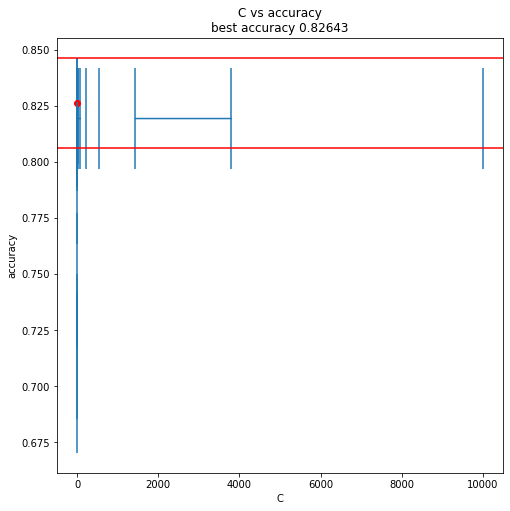

In [64]:
GridSearch_table_plot(logreg_cv_acc, "C", negative=False, graph=True)

In [65]:
best_models.append(logreg_cv_acc.best_estimator_)

In [66]:
best_models

[KNeighborsClassifier(n_neighbors=27),
 DecisionTreeClassifier(criterion='entropy', max_depth=3),
 SVC(C=1, gamma=1, kernel='linear', probability=True),
 LogisticRegression(C=0.08858667904100823)]

## RANDOM FORREST

In [67]:

from sklearn.ensemble import RandomForestClassifier

# run block of code and catch warnings
with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.filterwarnings("ignore")
    rfc=RandomForestClassifier(random_state=42)
    cv_scores = cross_val_score(rfc, X, Y, cv=5, scoring="recall") 
    print("Random Forrest :", cv_scores)
    print("cv_scores mean:{}".format(np.mean(cv_scores)))

Random Forrest : [0.82926829 0.87804878 0.7804878  0.73170732 0.64634146]
cv_scores mean:0.7731707317073171


In [68]:
param_grid = { 
    'n_estimators': list(range(10,101,10)),
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [3,4,5,6,7],
    'criterion' :['gini', 'entropy']
}

rfc_cv=GridSearchCV(rfc,param_grid,cv=5, n_jobs=-1, scoring='recall')
rfc_cv.fit(X,Y)

print("tuned hpyerparameters :(best parameters) ",rfc_cv.best_params_)
print("accuracy :",rfc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 40}
accuracy : 0.8268292682926829


In [69]:

new_list = []
new_list = list(range(3,21,1))
param_grid = { 
    'n_estimators': new_list,
    'max_features': ['auto', 'log2'],
    'max_depth' : [3,4,5],
    'criterion' :['gini', 'entropy']
}

rfc_cv_2=GridSearchCV(rfc,param_grid,cv=5, n_jobs=-1, scoring='recall')
rfc_cv_2.fit(X,Y)

print("tuned hyperparameters :(best parameters) ",rfc_cv_2.best_params_)
print("recall :",rfc_cv_2.best_score_)


tuned hyperparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 3}
recall : 0.8341463414634147


In [70]:
models.append(rfc_cv_2.best_estimator_)

In [71]:
best_models.append(rfc_cv_2.best_estimator_)

In [72]:
best_models

[KNeighborsClassifier(n_neighbors=27),
 DecisionTreeClassifier(criterion='entropy', max_depth=3),
 SVC(C=1, gamma=1, kernel='linear', probability=True),
 LogisticRegression(C=0.08858667904100823),
 RandomForestClassifier(max_depth=4, n_estimators=3, random_state=42)]

best parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 3}
best score:      0.83415 (+/-0.08221)
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 3,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
54        0.019506      0.004030         0.007571        0.000840   
36        0.015796      0.000672         0.007970        0.002321   
93        0.028475      0.002106         0.009510        0.003262   
75        0.032450      0.003977         0.008000        0.000948   
146       0.027785      0.003048         0.008208        0.001548   
164       0.033491      0.008574         0.012515        0.008015   
56        0.024987      0.003364         0.007178        0.000508   
97        0.043204      0.003611         0.008765        0.000196   
78        0.037802      0.003673         0.008440        0.000555   
79        0.043497      0.006391         0.010099        0.003026   
166       0.033034      0.004961         0.009519        0.002399   
38        0.022951      0.002012         0.008453        0.002296   
148       0.032727      0.004145         0.010056        0.003358   
96        0.037818      0.003104         0.009896        0.002699   
39        0.026831      0.002157         0.007773        0.001420   

    param_criterion param_max_depth param_max_features param_n_estimators  \
54             gini               4               log2                  3   
36             gini               4               auto                  3   
93             gini               5               log2                  6   
75             gini               5               auto                  6   
146         entropy               4               auto                  5   
164         entropy               4               log2                  5   
56             gini               4               log2                  5   
97             gini               5               log2                 10   
78             gini               5               auto                  9   
79             gini               5               auto                 10   
166         entropy               4               log2                  7   
38             gini               4               auto                  5   
148         entropy               4               auto                  7   
96             gini               5               log2                  9   
39             gini               4               auto                  6   

                                                params  split0_test_score  \
54   {'criterion': 'gini', 'max_depth': 4, 'max_fea...           0.890244   
36   {'criterion': 'gini', 'max_depth': 4, 'max_fea...           0.890244   
93   {'criterion': 'gini', 'max_depth': 5, 'max_fea...           0.878049   
75   {'criterion': 'gini', 'max_depth': 5, 'max_fea...           0.878049   
146  {'criterion': 'entropy', 'max_depth': 4, 'max_...           0.853659   
164  {'criterion': 'entropy', 'max_depth': 4, 'max_...           0.853659   
56   {'criterion': 'gini', 'max_depth': 4, 'max_fea...           0.829268   
97   {'criterion': 'gini', 'max_depth': 5, 'max_fea...           0.890244   
78   {'criterion': 'gini', 'max_depth': 5, 'max_fea...           0.890244   
79   {'criterion': 'gini', 'max_depth': 5, 'max_fea...           0.890244   
166  {'criterion': 'entropy', 'max_depth': 4, 'max_...           0.878049   
38   {'criterion': 'gini', 'max_depth': 4, 'max_fea...           0.829268   
148  {'criterion': 'entropy', 'max_depth': 4, 'max_...           0.878049   
96   {'criterion': 'gini', 'max_depth': 5, 'max_fea...           0.890244   
39   {'criterion': 'gini', 'max_depth': 4, 'max_fea...           0.841463   

     split1_test_score  split2_test_score  split3_test_score  \
54            0.914634           0.865854           0.817073   
36            0.914634           0.865854           0.817073   
93            0.890244           0.878049           0.841463   
75            0.890244           0.878049           0.841463   
146           0.865854           0.902439           0.841463   
164           0.865854           0.902439         

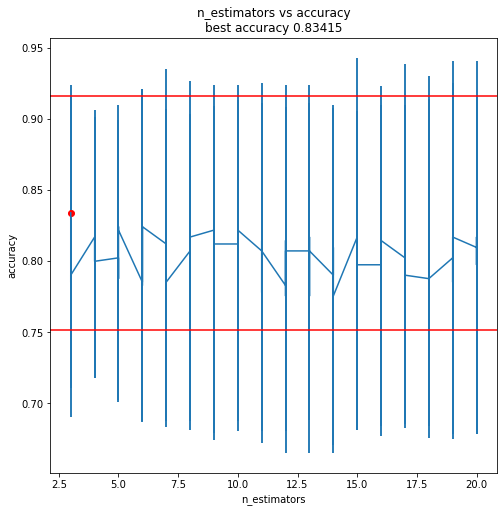

In [73]:
GridSearch_table_plot(rfc_cv_2, "n_estimators", negative=False, graph=True)

RandomForestClassifier(max_depth=4, n_estimators=3, random_state=42)


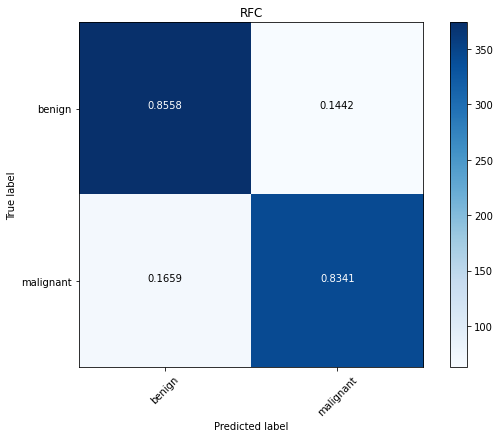

Confusion Matrix
[[374  63]
 [ 68 342]]
Accuracy: 0.8453364817001181
Sensitivity: 0.8341463414634146
Specificity: 0.8558352402745996
False Positive Rate: 0.14416475972540047
Preciscion: 0.8444444444444444
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       437
           1       0.84      0.83      0.84       410

    accuracy                           0.85       847
   macro avg       0.85      0.84      0.85       847
weighted avg       0.85      0.85      0.85       847

AUC: 0.9014650890215996


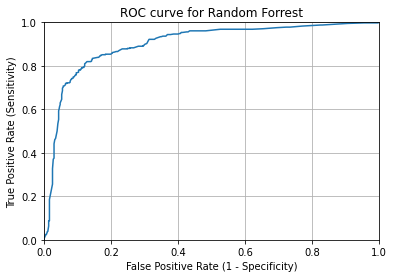

In [74]:
model = rfc_cv_2.best_estimator_



evaluate_model(model,X,Y, "RFC", "rfc_cm")
# store the predicted probabilities for class 1
y_pred_prob = cross_val_predict(model, X, Y, cv=5,method='predict_proba')[:, 1]
roc_curve(Y, y_pred_prob, 'ROC curve for Random Forrest', 'RFC_ROC.png')

In [75]:
model = rfc_cv_2.best_estimator_
feature_imp = pd.Series(model.feature_importances_,
                        index=X.columns).sort_values(ascending=False)
feature_imp

BI-RADS    0.538739
Margin     0.257903
Age        0.108097
Shape      0.090586
Density    0.004675
dtype: float64

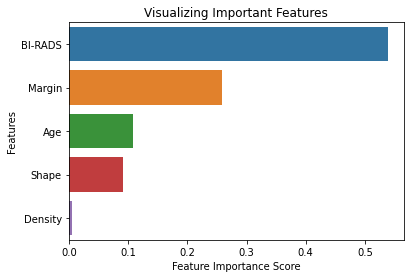

In [76]:
import seaborn as sns
# Creating bar plot 
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels in your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.savefig('feature importance rfc.png',bbox_inches='tight', dpi=300)
plt.show()

## EVALUATE  ALL MODELS

In [99]:
#EVALUTATION DATASTRUCTURES
accuracy_list =['accuracy']
sensitivity_list = ['sensitivity']
specificity_list = ['specificity']
fpr_list=['FPR']
precision_list=['preciscion']
auc_list=['AUC']
f1_list=['F1 Score']

In [92]:
best_models 

[KNeighborsClassifier(n_neighbors=27),
 DecisionTreeClassifier(criterion='entropy', max_depth=3),
 SVC(C=1, gamma=1, kernel='linear', probability=True),
 LogisticRegression(C=0.08858667904100823),
 RandomForestClassifier(max_depth=4, n_estimators=3, random_state=42)]

In [100]:

from sklearn import metrics


for model in best_models:    
    #predict with best model
   # model.fit(X_train,y_train)
    #y_pred=model.predict(X_test)
    y_pred =cross_val_predict(model, X, Y, cv=5)
    
    print(model)
    #EVALUTATION
    cm = confusion_matrix(Y, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
   
    #Classification Accuracy
    acc = metrics.accuracy_score(Y, y_pred)
    accuracy_list.append(acc)
    print("Accuracy: {}".format(acc))

    #Sensitivity
    recall = metrics.recall_score(Y, y_pred)
    sensitivity_list.append(recall)
    print("Sensitivity: {}".format(recall))

    #Specificity
    specificity = TN / float(TN + FP)
    specificity_list.append(specificity)
    print("Specificity: {}".format(specificity))

    #False Positive Rate
    fpr = FP / float(TN + FP)
    fpr_list.append(fpr)
    print("False Positive Rate: {}".format(fpr))

    #Preciscion
    pr = metrics.precision_score(Y, y_pred)
    precision_list.append(pr)
    print("Preciscion: {}".format(pr))
    
    #F1
    f1 = metrics.f1_score(Y, y_pred)
    f1_list.append(f1)
    print("F1 Score: {}".format(f1))
    
    #ROC Curve just to get AUC value (no plotting)
    # store the predicted probabilities for class 1
    y_pred_prob = cross_val_predict(model, X, Y, cv=5,method='predict_proba')[:, 1]
    
    #AUC Score
    auc = metrics.roc_auc_score(Y, y_pred_prob)
    auc_list.append(auc)
    print("AUC: {}".format(auc))


    

    


KNeighborsClassifier(n_neighbors=27)
Accuracy: 0.7969303423848878
Sensitivity: 0.8585365853658536
Specificity: 0.7391304347826086
False Positive Rate: 0.2608695652173913
Preciscion: 0.7553648068669528
F1 Score: 0.8036529680365296
AUC: 0.8649104202712509
DecisionTreeClassifier(criterion='entropy', max_depth=3)
Accuracy: 0.8406139315230224
Sensitivity: 0.7780487804878049
Specificity: 0.8993135011441648
False Positive Rate: 0.10068649885583524
Preciscion: 0.8787878787878788
F1 Score: 0.8253557567917206
AUC: 0.8778701791594575
SVC(C=1, gamma=1, kernel='linear', probability=True)
Accuracy: 0.8158205430932703
Sensitivity: 0.7439024390243902
Specificity: 0.8832951945080092
False Positive Rate: 0.11670480549199085
Preciscion: 0.8567415730337079
F1 Score: 0.7963446475195823
AUC: 0.8656583133337055
LogisticRegression(C=0.08858667904100823)
Accuracy: 0.8264462809917356
Sensitivity: 0.8341463414634146
Specificity: 0.8192219679633868
False Positive Rate: 0.18077803203661327
Preciscion: 0.8123515439

In [101]:
l = [len(x) for x in table_data]
l

[6, 8, 8, 8, 8, 8, 8, 6]

print evaluation results in tabular form for project documentation 


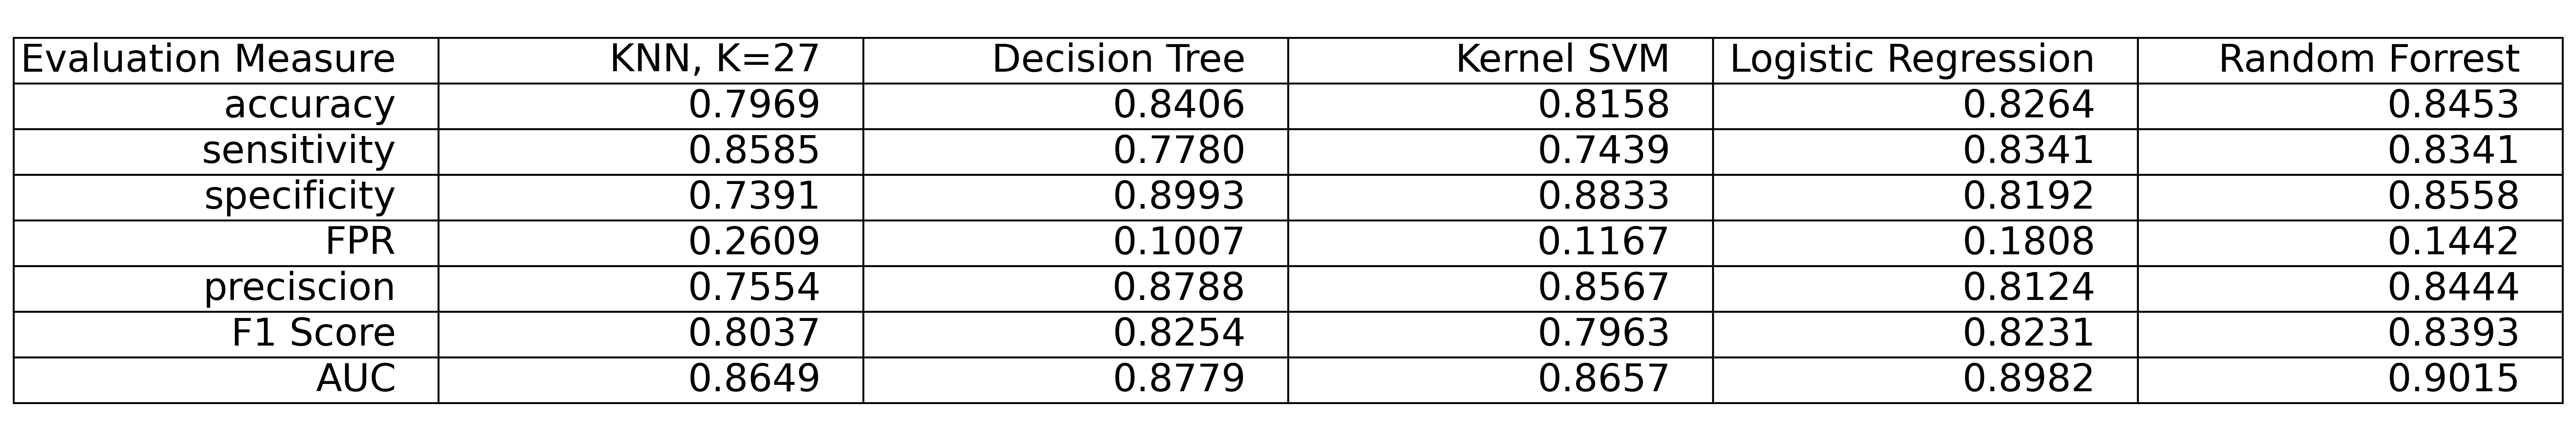

In [103]:
from decimal import *

#round results to 4 digits    
accuracy_list[1:6] = [Decimal(num).quantize(Decimal('1e-4')) for num in accuracy_list[1:6]]
sensitivity_list[1:6] = [Decimal(num).quantize(Decimal('1e-4')) for num in sensitivity_list[1:6]]
specificity_list[1:6] = [Decimal(num).quantize(Decimal('1e-4')) for num in specificity_list[1:6]]
fpr_list[1:6] = [Decimal(num).quantize(Decimal('1e-4')) for num in fpr_list[1:6]]
precision_list[1:6] = [Decimal(num).quantize(Decimal('1e-4')) for num in precision_list[1:6]]
f1_list[1:6] = [Decimal(num).quantize(Decimal('1e-4')) for num in f1_list[1:6]]
auc_list[1:6] = [Decimal(num).quantize(Decimal('1e-4')) for num in auc_list[1:6]]




fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1)

model_list=["Evaluation Measure", "KNN, K=27", "Decision Tree", "Kernel SVM", "Logistic Regression", "Random Forrest"]


table_data=[
    model_list,
    accuracy_list,
    sensitivity_list,
    specificity_list,
    fpr_list,
    precision_list,
    f1_list,
  auc_list,
]
table = ax.table(cellText=table_data, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(20)
table.scale(4,2)
ax.axis('off')

plt.savefig('predictions_recall.png', bbox_inches='tight', dpi=300)
plt.show()

print evaluation results of models using different subsets of features

ValueError: Each row in 'cellText' must have 5 columns

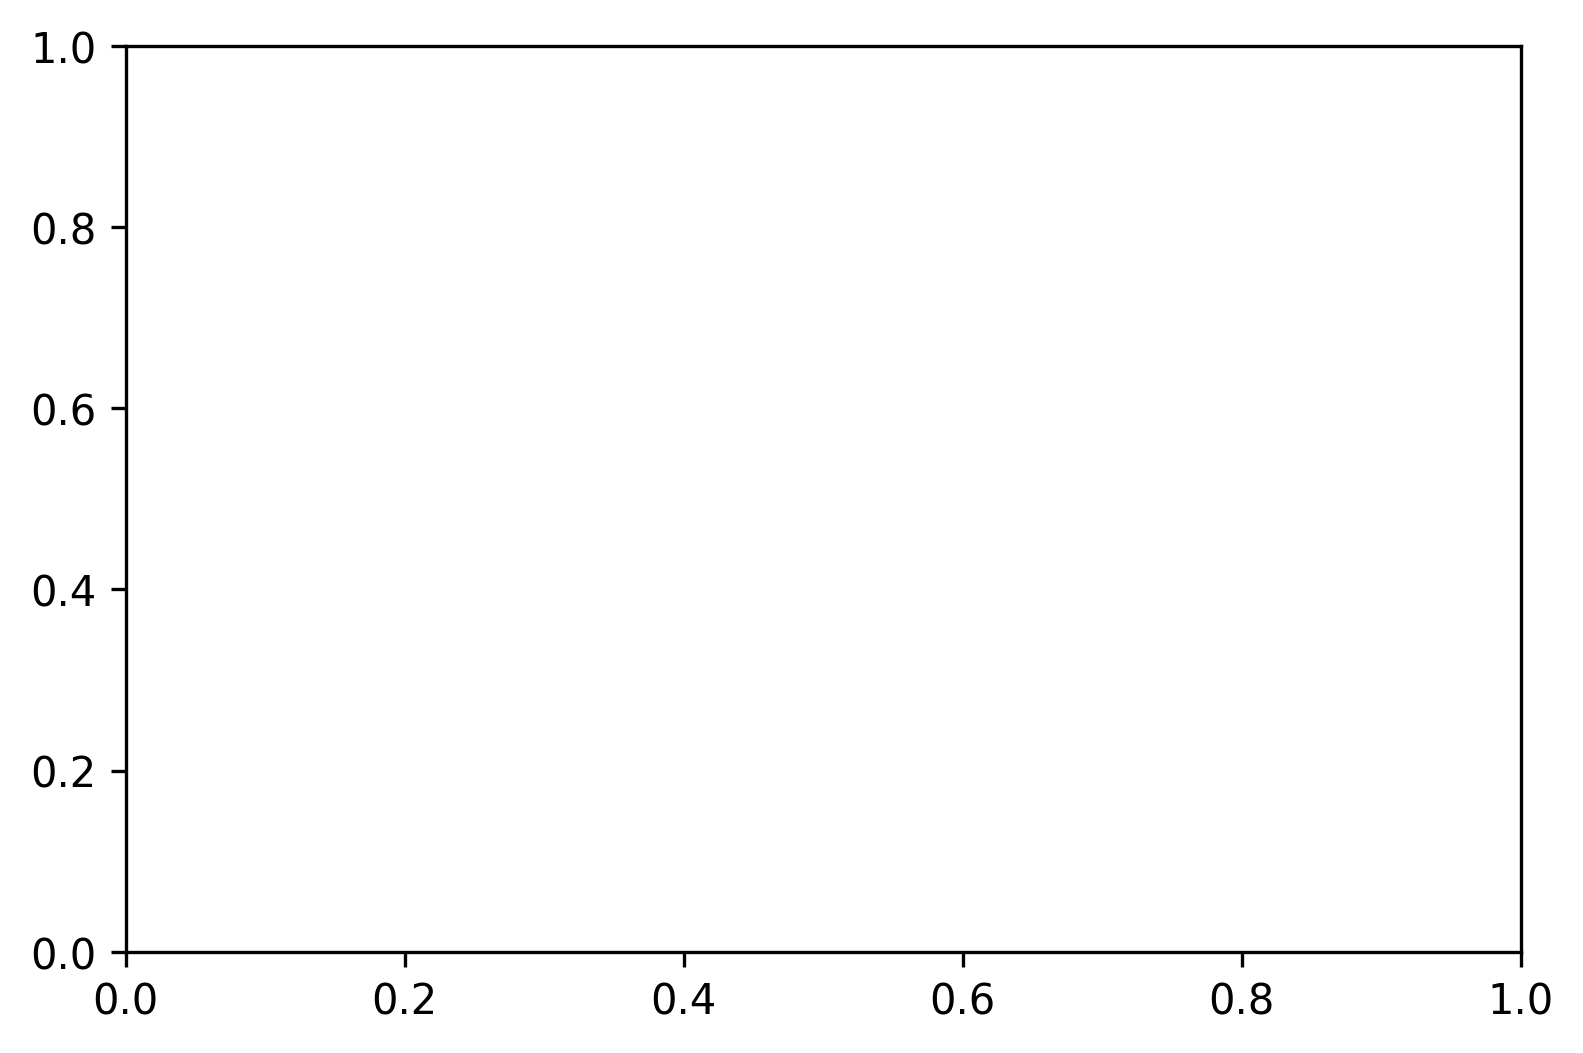

In [104]:
from decimal import *
#print evaluation results diff feature models

#round results to 4 digits    
accuracy_list[1:6] = [Decimal(num).quantize(Decimal('1e-4')) for num in accuracy_list[1:6]]
sensitivity_list[1:6] = [Decimal(num).quantize(Decimal('1e-4')) for num in sensitivity_list[1:6]]
specificity_list[1:6] = [Decimal(num).quantize(Decimal('1e-4')) for num in specificity_list[1:6]]
fpr_list[1:6] = [Decimal(num).quantize(Decimal('1e-4')) for num in fpr_list[1:6]]
precision_list[1:6] = [Decimal(num).quantize(Decimal('1e-4')) for num in precision_list[1:6]]
f1_list[1:6] = [Decimal(num).quantize(Decimal('1e-4')) for num in f1_list[1:6]]
auc_list[1:6] = [Decimal(num).quantize(Decimal('1e-4')) for num in auc_list[1:6]]




fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1)

model_list=["Evaluation Measure","full data", "data model 4", "data model 5", "data model 2"]


table_data=[
    model_list,
    accuracy_list,
    sensitivity_list,
    specificity_list,
    fpr_list,
    precision_list,
    f1_list,
    auc_list,
]
table = ax.table(cellText=table_data, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(20)
table.scale(4,2)
ax.axis('off')
plt.savefig('rfc_diff_features.png', bbox_inches='tight', dpi=300)
plt.show()

In [107]:
X_2 = medical_data.drop(columns=["Severity"]) 
X_2.tail() #test if successfull

BI-RADS  Age  Shape  Margin  Density
956        3   29      3       0        2
957        3   38      0       4        2
958        3   46      0       4        2
959        4   48      0       4        2
960        3   44      1       2        2

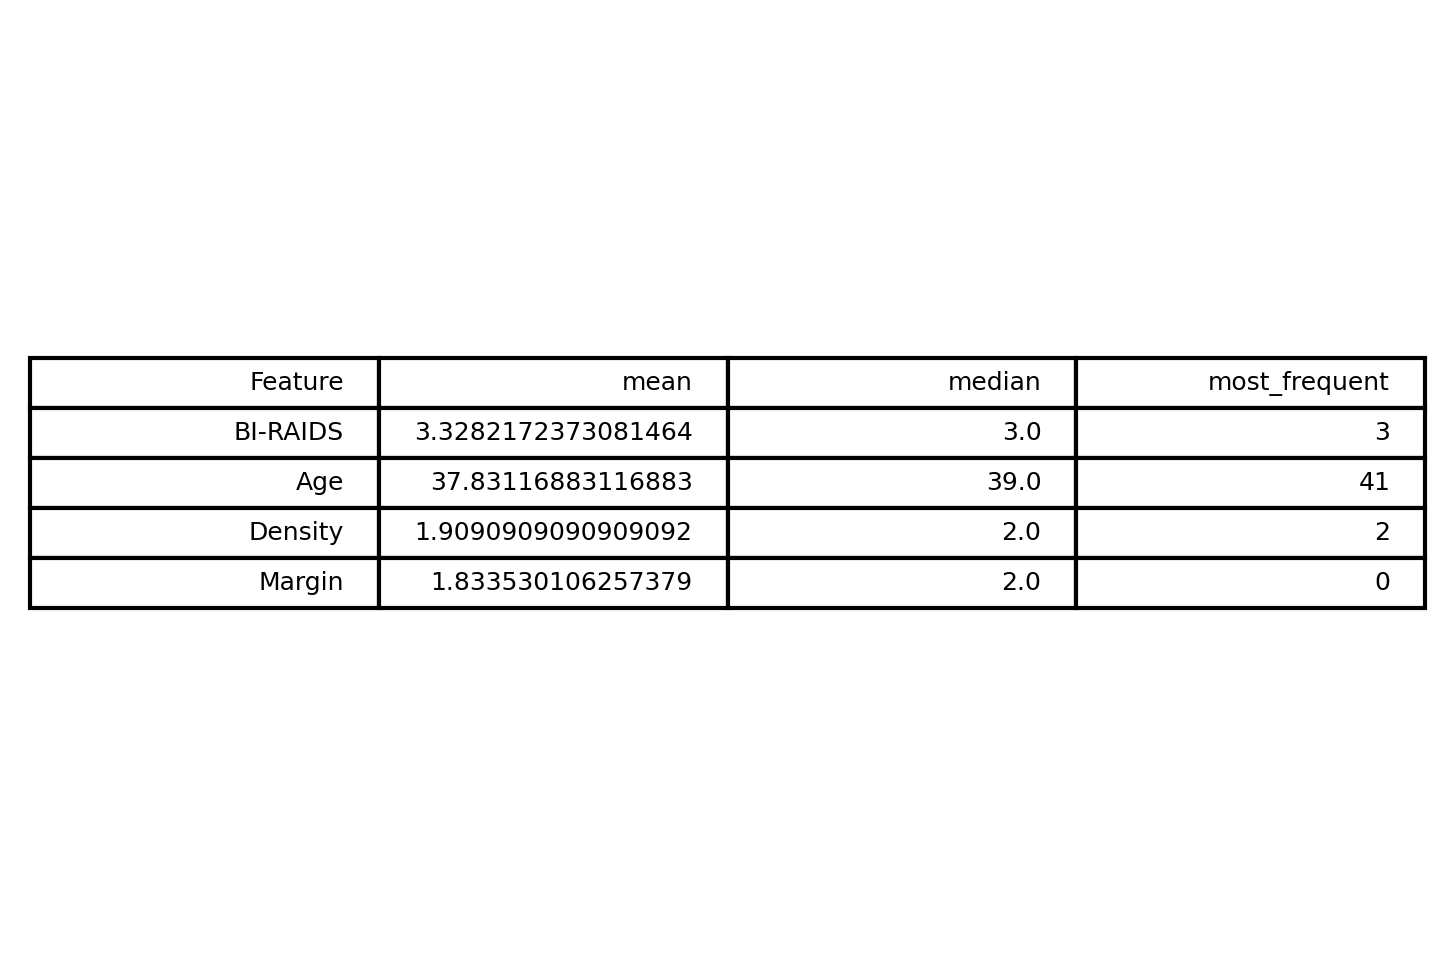

In [108]:
#create statistical numbers table
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1)
head_list=["Feature", 'mean', 'median', 'most_frequent']
table_data=[
        head_list,
        ['BI-RAIDS',X_2['BI-RADS'].mean(),X_2['BI-RADS'].median(),
         X_2['BI-RADS'].value_counts().idxmax()],
        ['Age',X_2.Age.mean(),X_2.Age.median(),
         X_2.Age.value_counts().idxmax()],
        ['Density',X_2.Density.mean(),X_2.Density.median(),
         X_2.Density.value_counts().idxmax()],
        ['Margin',X_2.Margin.mean(),X_2.Margin.median(),
         X_2.Margin.value_counts().idxmax()],
        
]
table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(18)
ax.axis('off')
plt.savefig('DP_stat_nums.png', bbox_inches='tight', dpi=300)
plt.show()

In [109]:
Y_2 = medical_data["Severity"].values
Y_2.shape

(847,)

In [110]:
from sklearn import impute
def preprocess_data(dataset, s):
    imputer = impute.SimpleImputer(strategy=s)
    
    values = imputer.fit_transform([dataset.Density.values]) 
    dataset.Density.update(pd.Series(values[0]))
    
    values = imputer.fit_transform([dataset.Margin.values])
    dataset.Margin.update(pd.Series(values[0]))
    
    values = imputer.fit_transform([dataset.Age.values])
    dataset.Age.update(pd.Series(values[0]))
    
    values = imputer.fit_transform([dataset['BI-RADS'].values])
    dataset['BI-RADS'].update(pd.Series(values[0]))
    
    
    le = preprocessing.LabelEncoder()
   #convert the categorical columns into numeric

    dataset['BI-RADS'] = le.fit_transform(dataset['BI-RADS'])
    dataset['Age'] = le.fit_transform(dataset['Age'])
    dataset['Shape'] = le.fit_transform(dataset['Shape'])
    dataset['Margin'] = le.fit_transform(dataset['Margin'])
    dataset['Density'] = le.fit_transform(dataset['Density'])
    dataset['Severity'] = le.fit_transform(dataset['Severity'])
    
    X = dataset.drop(columns=["Severity"]) 
    Y = Y = dataset["Severity"].values
    
    
    
    return X,Y

KNeighborsClassifier(n_neighbors=27)


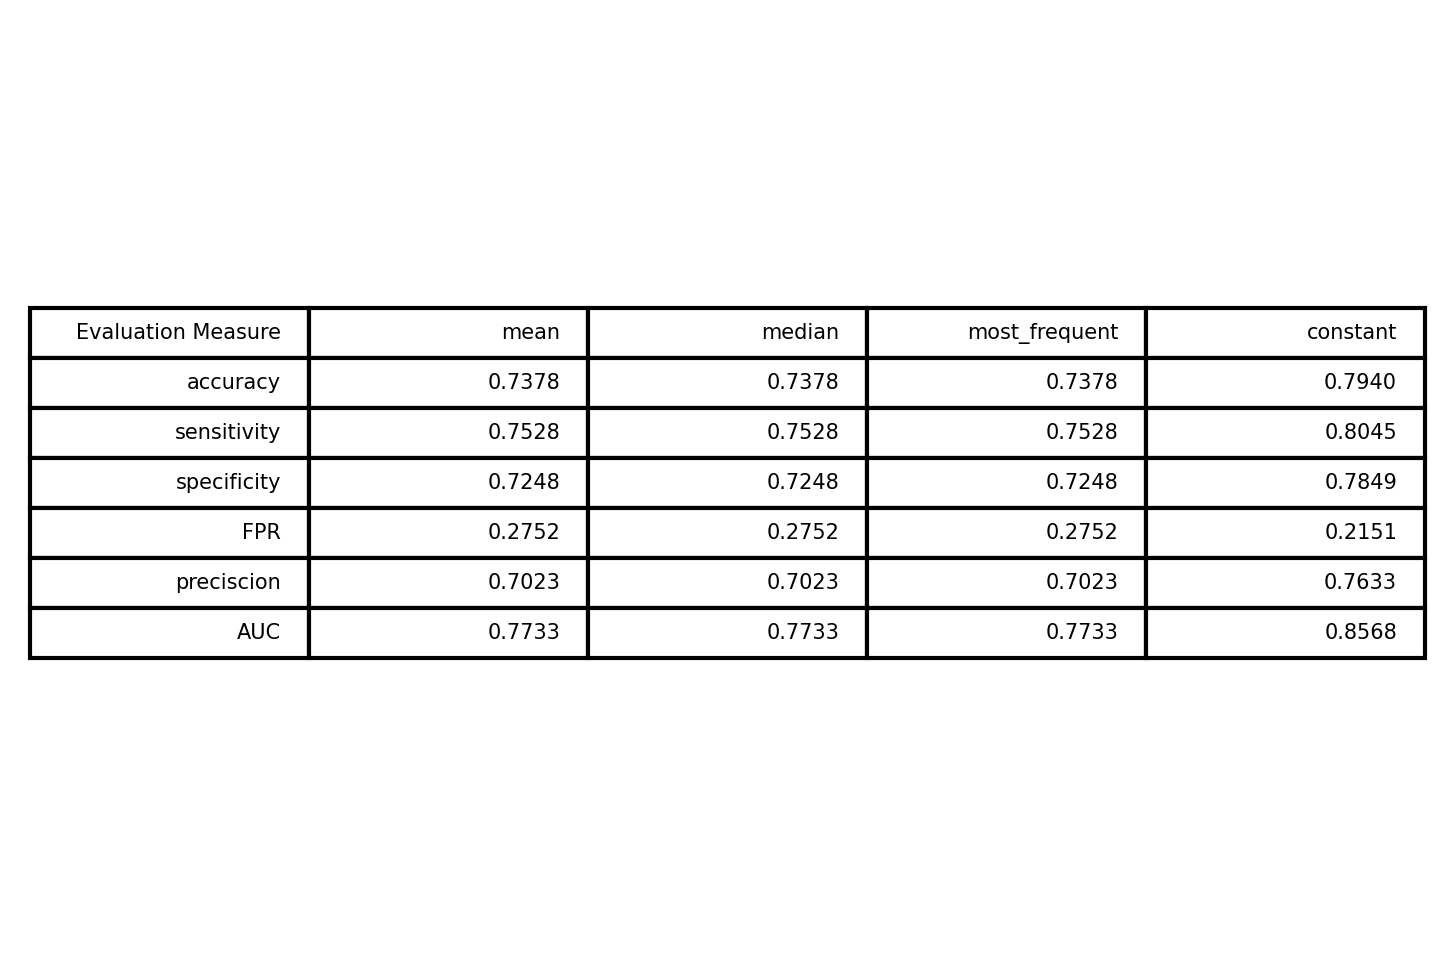

In [114]:


#EVALUTATION DATASTRUCTURES
accuracy_list =['accuracy']
sensitivity_list = ['sensitivity']
specificity_list = ['specificity']
fpr_list=['FPR']
precision_list=['preciscion']
auc_list=['AUC']
f1_list=['F1-Score']
model = [best_models[0]]
strategies = ["mean", 'median', 'most_frequent', 'constant']



for model in model:  
    print(model)
    #evalute predictions on different preprocessing techniques
    for s in strategies:
        dataset = pd.read_csv("/Users/mikhail/Downloads/mamografias.csv", na_values="?")
        
        X_2,Y_2 = preprocess_data(dataset, s)
        
        
        #X_2 = data.drop(columns=["Severity"]) 
        #Y_2 = data["Severity"].values
        
    
        
        y_pred =cross_val_predict(model, X_2, Y_2, cv=5)
        
        #EVALUTATION

        
        cm = confusion_matrix(Y_2, y_pred)
        TP = cm[1, 1]
        TN = cm[0, 0]
        FP = cm[0, 1]
        FN = cm[1, 0]
       
        
        #Classification Accuracy
        acc = metrics.accuracy_score(Y_2, y_pred)
        accuracy_list.append(acc)
        #print("Accuracy: {}".format(acc))

        #Sensitivity
        recall = metrics.recall_score(Y_2, y_pred)
        sensitivity_list.append(recall)
        #print("Sensitivity: {}".format(recall))

        #Specificity
        specificity = TN / float(TN + FP)
        specificity_list.append(specificity)
        #print("Specificity: {}".format(specificity))

        #False Positive Rate
        fpr = FP / float(TN + FP)
        fpr_list.append(fpr)
        #print("False Positive Rate: {}".format(fpr))

        #Precision
        pr = metrics.precision_score(Y_2, y_pred)
        precision_list.append(pr)
       # print("Preciscion: {}".format(pr))

        # store the predicted probabilities for class 1
        y_pred_prob = cross_val_predict(model, X_2, Y_2, cv=5, method='predict_proba')[:, 1]
        
        #AUC Score
        auc = metrics.roc_auc_score(Y_2, y_pred_prob)
        auc_list.append(auc)
        #print("AUC: {}".format(auc))
        
    
    #round results to 4 digits    
    accuracy_list[1:6] = [Decimal(num).quantize(Decimal('1e-4')) for num in accuracy_list[1:6]]
    sensitivity_list[1:6] = [Decimal(num).quantize(Decimal('1e-4')) for num in sensitivity_list[1:6]]
    specificity_list[1:6] = [Decimal(num).quantize(Decimal('1e-4')) for num in specificity_list[1:6]]
    fpr_list[1:6] = [Decimal(num).quantize(Decimal('1e-4')) for num in fpr_list[1:6]]
    precision_list[1:6] = [Decimal(num).quantize(Decimal('1e-4')) for num in precision_list[1:6]]
    f1_list[1:6] = [Decimal(num).quantize(Decimal('1e-4')) for num in f1_list[1:6]]
    auc_list[1:6] = [Decimal(num).quantize(Decimal('1e-4')) for num in auc_list[1:6]]
    
    

    
    #create result table
    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(1,1,1)

    head_list=["Evaluation Measure", 'mean', 'median', 'most_frequent', 'constant']
    table_data=[
        head_list,
        accuracy_list,
        sensitivity_list,
        specificity_list,
        fpr_list,
        precision_list,
        auc_list,
    ]
    table = ax.table(cellText=table_data, loc='center')
    table.set_fontsize(18)
    ax.axis('off')
    plt.savefig('KNN_DP.png', bbox_inches='tight', dpi=300)
    plt.show()
    
    
    
    #clear lists
    for _list in table_data[1:7]:
        del _list[1:5]


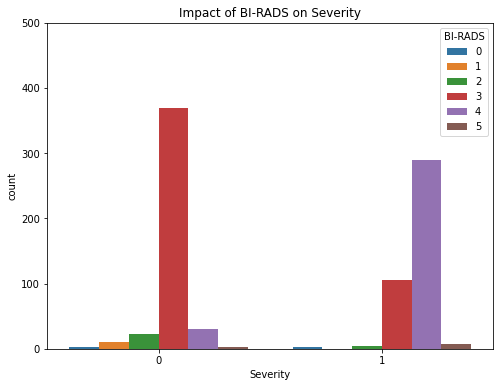

In [112]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Severity', data=medical_data, hue='BI-RADS')
ax.set_ylim(0,500)
plt.title("Impact of BI-RADS on Severity")
plt.savefig('Impact of BI-RADS on Severity.png',bbox_inches='tight', dpi=300)
plt.show()